# 과적합과 편향-분산 트레이드 오프

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset, random_split
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 64
learning_rate = 0.001
total_data_size = 20000

In [3]:
def load_mnist_data(batch_size: int, train_size: int, val_size: int):
    mnist_train = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
    subset_indices = list(range(total_data_size))
    mnist_subset = Subset(mnist_train, subset_indices)
    train_dataset, val_dataset = random_split(mnist_subset, [train_size, val_size])
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
    return train_loader, val_loader

In [4]:
def load_split_dataset(ratio: float):
    size_of_dataset = total_data_size
    return load_mnist_data(batch_size, int(size_of_dataset * ratio), size_of_dataset - int(size_of_dataset * ratio))

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 500)
        self.fc2 = nn.Linear(500, 10)
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [6]:
def train(model, device, train_loader, optimizer, criterion):
    model.train()
    total_loss = 0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    return avg_loss

In [8]:
def evaluate(model, device, loader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            total_loss += loss.item()
    avg_loss = total_loss / len(loader)
    return avg_loss


train_data = 219, val_date \ = 94
epoch = 1, train_loss = 0.4867, val_loss = 0.2803
epoch = 2, train_loss = 0.2198, val_loss = 0.2076
epoch = 3, train_loss = 0.1494, val_loss = 0.1678
epoch = 4, train_loss = 0.1057, val_loss = 0.1495
epoch = 5, train_loss = 0.0796, val_loss = 0.1411


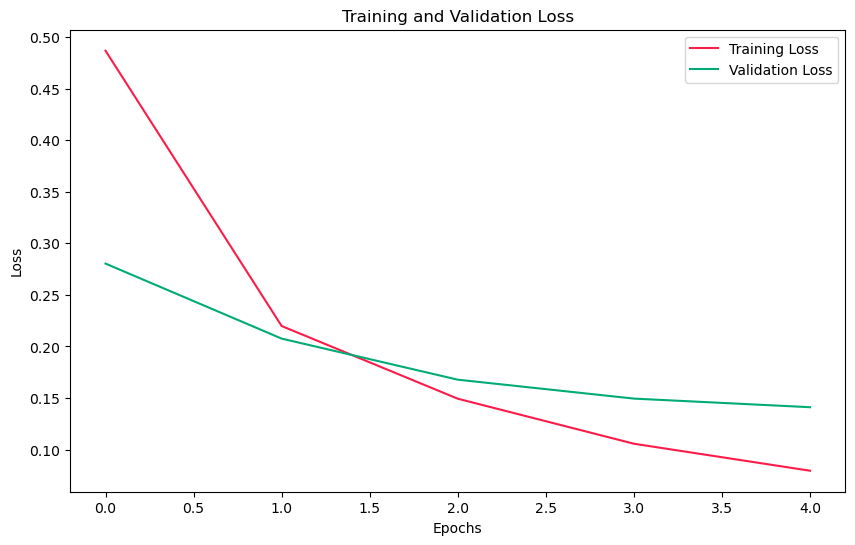

In [9]:
# Trade off

train_loader, val_loader = load_split_dataset(0.7)
print(f"train_data = {len(train_loader)}, val_date \ = {len(val_loader)}")

model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_losses: list[float] = []
val_losses: list[float] = []

for epoch in range(5):
    train_loss = train(model, device, train_loader, optimizer, criterion)
    val_loss = evaluate(model, device, val_loader, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"epoch = {epoch + 1}, train_loss = {train_loss:.4f}, val_loss = {val_loss:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', color="#fc1c49")
plt.plot(val_losses, label='Validation Loss', color="#00ab75")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


train_data = 157, val_date \ = 157
epoch = 1, train_loss = 0.5576, val_loss = 0.3116
epoch = 2, train_loss = 0.2559, val_loss = 0.2501
epoch = 3, train_loss = 0.1804, val_loss = 0.1948


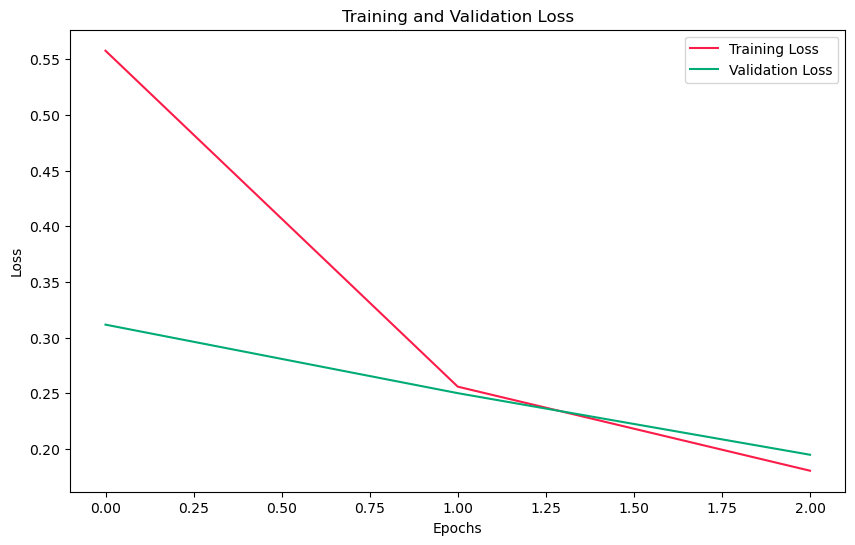

In [10]:
# Underfitting

train_loader, val_loader = load_split_dataset(0.5)
print(f"train_data = {len(train_loader)}, val_date \ = {len(val_loader)}")

model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_losses: list[float] = []
val_losses: list[float] = []

for epoch in range(3):
    train_loss = train(model, device, train_loader, optimizer, criterion)
    val_loss = evaluate(model, device, val_loader, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"epoch = {epoch + 1}, train_loss = {train_loss:.4f}, val_loss = {val_loss:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', color="#fc1c49")
plt.plot(val_losses, label='Validation Loss', color="#00ab75")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

train_data = 310, val_date \ = 4
epoch = 1, train_loss = 0.4198, val_loss = 0.1957
epoch = 2, train_loss = 0.1857, val_loss = 0.1614
epoch = 3, train_loss = 0.1185, val_loss = 0.1318
epoch = 4, train_loss = 0.0857, val_loss = 0.1450
epoch = 5, train_loss = 0.0622, val_loss = 0.0892
epoch = 6, train_loss = 0.0445, val_loss = 0.1219
epoch = 7, train_loss = 0.0338, val_loss = 0.1673
epoch = 8, train_loss = 0.0252, val_loss = 0.1124
epoch = 9, train_loss = 0.0193, val_loss = 0.0863
epoch = 10, train_loss = 0.0108, val_loss = 0.1007
epoch = 11, train_loss = 0.0086, val_loss = 0.1088
epoch = 12, train_loss = 0.0065, val_loss = 0.1054
epoch = 13, train_loss = 0.0048, val_loss = 0.2551
epoch = 14, train_loss = 0.0043, val_loss = 0.1327
epoch = 15, train_loss = 0.0148, val_loss = 0.1062
epoch = 16, train_loss = 0.0091, val_loss = 0.0731
epoch = 17, train_loss = 0.0041, val_loss = 0.0919
epoch = 18, train_loss = 0.0012, val_loss = 0.0924
epoch = 19, train_loss = 0.0007, val_loss = 0.0938
epoch =

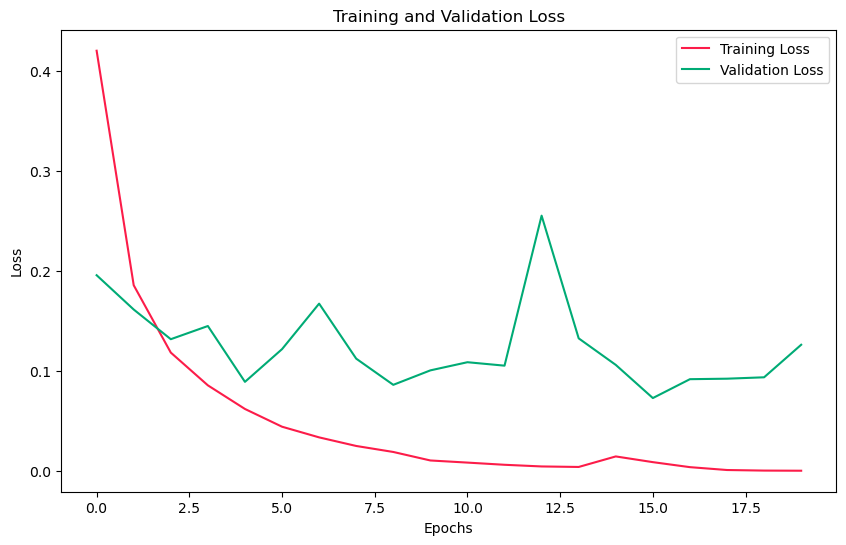

In [11]:
# Overfitting

train_loader, val_loader = load_split_dataset(0.99)
print(f"train_data = {len(train_loader)}, val_date \ = {len(val_loader)}")

model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_losses: list[float] = []
val_losses: list[float] = []

for epoch in range(20):
    train_loss = train(model, device, train_loader, optimizer, criterion)
    val_loss = evaluate(model, device, val_loader, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"epoch = {epoch + 1}, train_loss = {train_loss:.4f}, val_loss = {val_loss:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', color="#fc1c49")
plt.plot(val_losses, label='Validation Loss', color="#00ab75")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()